In [1]:
#Project 2 --- Loan_Prediction

In [82]:
#1. Understanding the basic concepts of data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
trainingDataset = pd.read_csv("C://Users//hp//Desktop//Henry Harvin//Assignment #6//train.csv")
testingDataset = pd.read_csv("C://Users//hp//Desktop//Henry Harvin//Assignment #6//test.csv")

In [5]:
print (trainingDataset.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [7]:
com = pd.concat([trainingDataset, testingDataset],ignore_index=True, sort=False)

In [9]:
print (com.shape)

(981, 13)


In [10]:
print (com.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [11]:
y = trainingDataset['Loan_Status']

In [12]:
print ("TRAINING DATA DETAILS")
print ("Total  number of records present in the dataset -", trainingDataset.shape[0])
print ("Total  number of columns present in the dataset -", trainingDataset.shape[1])

TRAINING DATA DETAILS
Total  number of records present in the dataset - 614
Total  number of columns present in the dataset - 13


In [13]:
print ("\n TESTING DATA DETAILS")
print ("Total  number of records present in the dataset -", testingDataset.shape[0])
print ("Total  number of columns present in the dataset -", testingDataset.shape[1])


 TESTING DATA DETAILS
Total  number of records present in the dataset - 367
Total  number of columns present in the dataset - 12


In [14]:
print ("Following are the columns present in the dataset - ", trainingDataset.columns)
print (trainingDataset.dtypes)

Following are the columns present in the dataset -  Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [16]:
print ("TOTAL NUMBER OF RECORDS IN THE COMBINED DATASET  - ", com.shape[0])
print ("\n")

TOTAL NUMBER OF RECORDS IN THE COMBINED DATASET  -  981




In [17]:
categoricalColNames = com.iloc[:,1:].select_dtypes(include=['object'])
requiredCategoricalVariables = list(categoricalColNames.columns.values)
for x in requiredCategoricalVariables:
    print ("Number of value counts for -", x)
    print (combined[x].value_counts())
    print ('Number of Missing values: %d'% sum(com[x].isnull()))
    print ("\n")

Number of value counts for - Gender
Male      775
Female    182
Name: Gender, dtype: int64
Number of Missing values: 24


Number of value counts for - Married
Yes    631
No     347
Name: Married, dtype: int64
Number of Missing values: 3


Number of value counts for - Dependents
0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64
Number of Missing values: 25


Number of value counts for - Education
Graduate        763
Not Graduate    218
Name: Education, dtype: int64
Number of Missing values: 0


Number of value counts for - Self_Employed
No     807
Yes    119
Name: Self_Employed, dtype: int64
Number of Missing values: 55


Number of value counts for - Property_Area
Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64
Number of Missing values: 0


Number of value counts for - Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64
Number of Missing values: 367




In [18]:
numericalColNames = com.iloc[:,1:].select_dtypes(include=['int64','float64'])
requiredCategoricalVariables = list(numericalColNames.columns.values)
for x in requiredCategoricalVariables:
    print ('Number of missing values in ', x ,': %d'% sum(com[x].isnull()))

Number of missing values in  ApplicantIncome : 0
Number of missing values in  CoapplicantIncome : 0
Number of missing values in  LoanAmount : 27
Number of missing values in  Loan_Amount_Term : 20
Number of missing values in  Credit_History : 79


In [19]:
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
Loan_ID              981 non-null object
Gender               957 non-null object
Married              978 non-null object
Dependents           956 non-null object
Education            981 non-null object
Self_Employed        926 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Credit_History       902 non-null float64
Property_Area        981 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 99.7+ KB


In [20]:
com.head(5).append(com.head(3))

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [21]:
com.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [22]:
com.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [23]:
com.index

RangeIndex(start=0, stop=981, step=1)

In [24]:
### FILLING THE MISSING VALUES IN THE REQUIRED COLUMNS
com['LoanAmount'].fillna(com['LoanAmount'].mean(), inplace=True)
com['Loan_Amount_Term'].fillna(com['Loan_Amount_Term'].mean(), inplace=True)
com['Self_Employed'].fillna('No',inplace=True)
com['Married'].fillna('NA',inplace=True)
com['Gender'].fillna('NA',inplace=True)
com['Dependents'].fillna('0',inplace=True)
com['Credit_History'].fillna(0,inplace=True)

In [25]:
requiredColumns = list(com.columns.values)
print ("Checking if there are any missing values in the dataset - ")
for col in requiredColumns:
    print ("column name  -", col)
    print ('Final #missing: %d'% sum(com[col].isnull()))
    print ("\n")

Checking if there are any missing values in the dataset - 
column name  - Loan_ID
Final #missing: 0


column name  - Gender
Final #missing: 0


column name  - Married
Final #missing: 0


column name  - Dependents
Final #missing: 0


column name  - Education
Final #missing: 0


column name  - Self_Employed
Final #missing: 0


column name  - ApplicantIncome
Final #missing: 0


column name  - CoapplicantIncome
Final #missing: 0


column name  - LoanAmount
Final #missing: 0


column name  - Loan_Amount_Term
Final #missing: 0


column name  - Credit_History
Final #missing: 0


column name  - Property_Area
Final #missing: 0


column name  - Loan_Status
Final #missing: 367




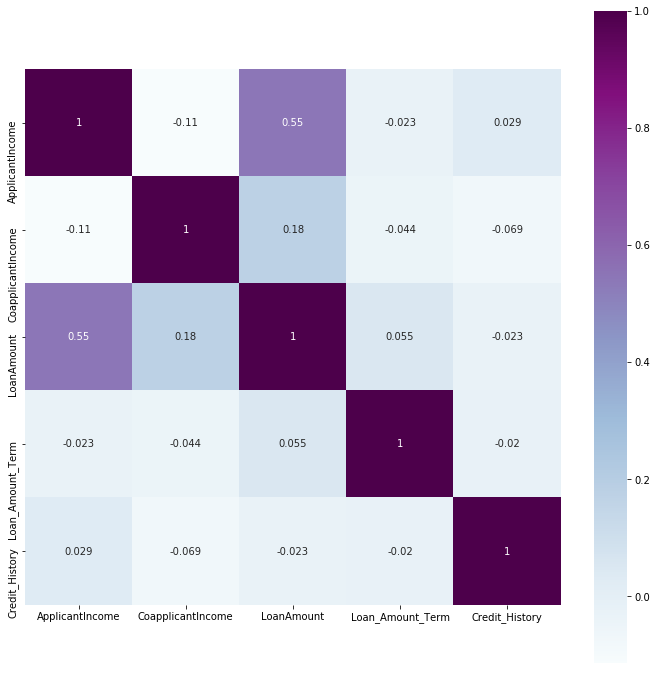

In [26]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(com.iloc[:, 2:].corr(), annot=True, square=True, cmap='BuPu')
plt.show()

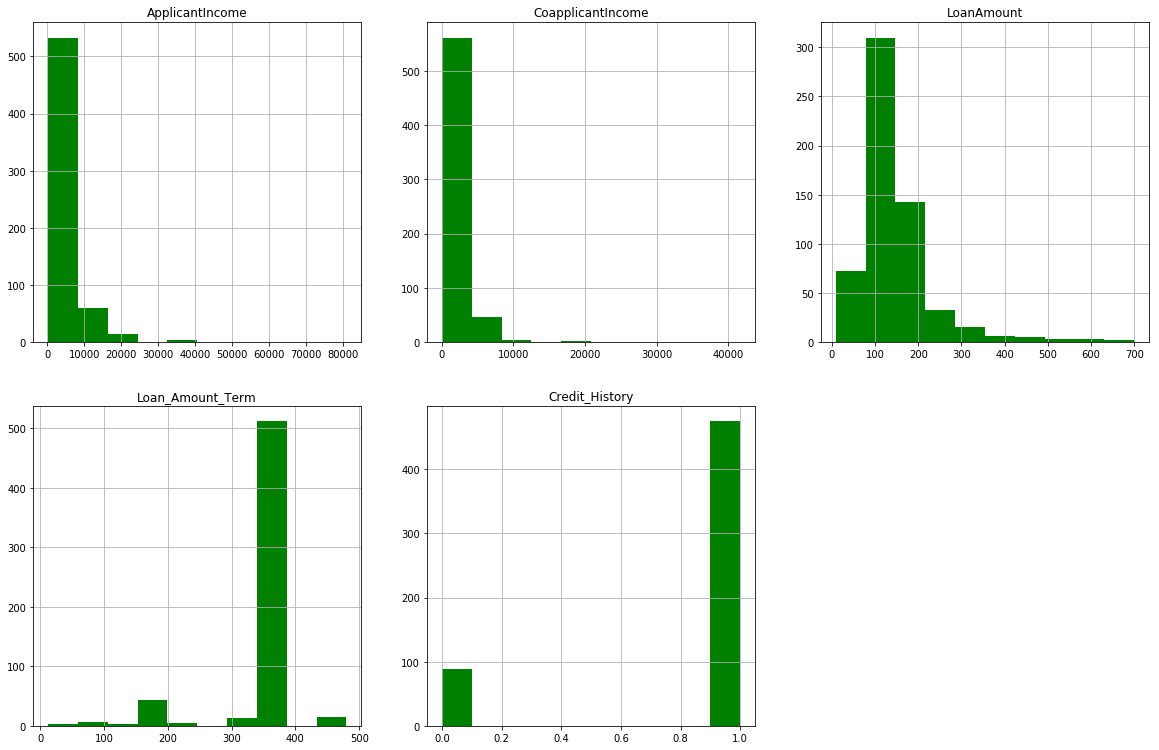

In [27]:
plt.figure(figsize=(20,20))

temp = trainingDataset.iloc[:,2:].select_dtypes(include=['int64','float64'])
requiredColumns = list(temp.columns.values)
counter = 1
for col in requiredColumns:
    plt.subplot(3, 3, counter)
    trainingDataset[col].hist(color = 'green')
    plt.title(col)
    counter = counter + 1

In [ ]:
#Lets understand the distributions of ApplicantIncome and LoanAmount. 
#Also Lets understand the categorical variables in more detail.

<Figure size 720x720 with 0 Axes>

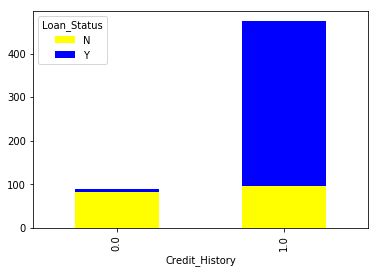

In [29]:
plt.figure(figsize=(10,10))
temp3 = pd.crosstab(trainingDataset['Credit_History'], trainingDataset['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['yellow','blue'], grid=False)

In [30]:
nrow_train = trainingDataset.shape[0]
X_train = com[:nrow_train]
X_test = com[nrow_train:]
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le = LabelEncoder()
for i in var_mod:
    X_train[i] = le.fit_transform(X_train[i])
    X_test[i] = le.fit_transform(X_test[i])
print ("CONVERTED THE CATEGORICAL VARIABLES INTO NUMERICALS")

CONVERTED THE CATEGORICAL VARIABLES INTO NUMERICALS


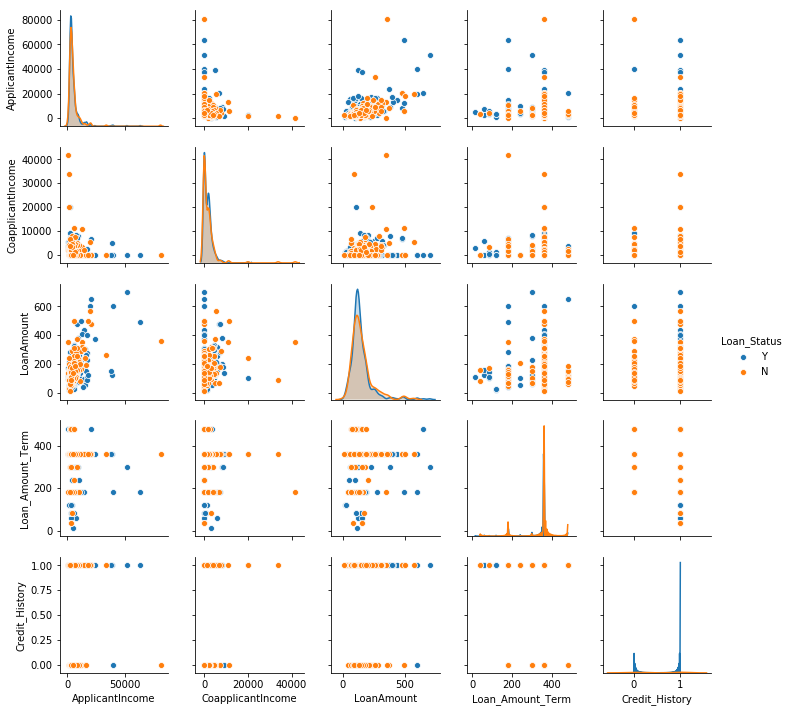

In [31]:
sns.pairplot(trainingDataset[trainingDataset.columns.values], hue='Loan_Status', diag_kind='kde', height=2);

In [32]:
### THE BOX PLOT SHOW THE OUTLIERS IN YOUR DATA. 
### AS YOU CAN SEE COLUMNS NAMED "APPLICANT INCOME" AND "CO APPLICANT INCOME" HAVE OUTLIERS
temp = trainingDataset.iloc[:,2:].select_dtypes(include=['int64','float64'])
requiredColumns = list(temp.columns.values)
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

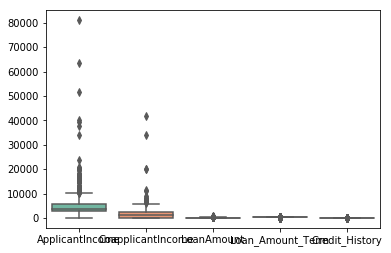

In [33]:
#trainingDataset[trainingDataset.columns.values].plot.box();
sns.boxplot(data=X_train[requiredColumns], palette="Set2")

In [ ]:
#The above diagram tells us that there are outliers in columns such as "Applicant Income" and "Co Applicant Income"

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split #For K-fold cross validation

from sklearn import metrics
X = X_train.iloc[:, 2:11].values
y = X_train.iloc[:, 12].values

In [35]:
#X = X.reshape(X.shape[0],1)
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.20, random_state=0)
LR_model = LogisticRegression(solver='sag')
LR_model.fit(X_tr,y_tr)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
#Make predictions on training set:
predictions = LR_model.predict(X_te)

In [37]:
#Print accuracy
accuracy = metrics.accuracy_score(predictions,y_te)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 73.171%


In [38]:
print("\n Classification report for classifier %s:\n%s\n"
      % (LR_model, metrics.classification_report(y_te, predictions)))


 Classification report for classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.73      1.00      0.85        90

   micro avg       0.73      0.73      0.73       123
   macro avg       0.37      0.50      0.42       123
weighted avg       0.54      0.73      0.62       123




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [41]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_te, predictions))
count = 0

Confusion matrix:
[[ 0 33]
 [ 0 90]]


In [42]:
print ("TOTAL NUMBER OF TESTING RECORD - ",X_te.shape[0])
for x in range(len(X_te)):
    if(y_te[x] == predictions[x]):
        count = count + 1

TOTAL NUMBER OF TESTING RECORD -  123


In [43]:
print ("NUMBER OF CORRECTLY PREDICTED OUTPUTS - ",count)
print("\n")

NUMBER OF CORRECTLY PREDICTED OUTPUTS -  90




In [44]:
for x in range(0,5):
    if(y_te[x] == predictions[x]):
        print ("TESTING RECORD - ",X_te[x])
        print ("ACTUAL OUTPUT - ", y_te[x])
        print ("PREDICTED OUTPUT - ",predictions[x])
        print ("_________________________________")

TESTING RECORD -  [1.000e+00 0.000e+00 0.000e+00 1.000e+00 7.085e+03 0.000e+00 8.400e+01
 3.600e+02 1.000e+00]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
TESTING RECORD -  [2.000e+00 0.000e+00 0.000e+00 0.000e+00 6.133e+03 3.906e+03 3.240e+02
 3.600e+02 1.000e+00]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
TESTING RECORD -  [2.000e+00 2.000e+00 0.000e+00 0.000e+00 2.708e+03 1.167e+03 9.700e+01
 3.600e+02 1.000e+00]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________


In [45]:
temp = trainingDataset.iloc[:,2:11]
requiredColumns = list(temp.columns.values)

In [46]:
print (requiredColumns)

['Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [47]:
FinalData = list(zip(X_te, y_te, predictions))

In [48]:
print (FinalData[0])

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 7.085e+03, 0.000e+00,
       8.400e+01, 3.600e+02, 1.000e+00]), 1, 1)


In [49]:
my_submission = pd.DataFrame( X_te, columns=[requiredColumns])
my_submission['Actual_Loan_Status'] = y_te
my_submission['Predicted_Loan_Status'] = predictions
my_submission.head()
my_submission.to_csv('LoanPredictionSubmissions.csv', index=False)

In [50]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split #For K-fold cross validation

In [51]:
from sklearn import metrics

In [52]:
model = LogisticRegression(solver='sag')
X = X_train.iloc[:, 10:11].values
y = X_train.iloc[:, 12].values

In [53]:
#X = X.reshape(X.shape[0],1)
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.25,random_state=0)
model.fit(X_tr,y_tr)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
#Make predictions on training set:
predictions = model.predict(X_te)

In [55]:
#Print accuracy
accuracy = metrics.accuracy_score(predictions,y_te)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 79.221%


In [56]:
print("\n Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(y_te, predictions)))


 Classification report for classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False):
              precision    recall  f1-score   support

           0       0.67      0.51      0.58        43
           1       0.83      0.90      0.86       111

   micro avg       0.79      0.79      0.79       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.78      0.79      0.78       154




In [57]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_te, predictions))
count = 0

Confusion matrix:
[[ 22  21]
 [ 11 100]]


In [58]:
print ("TOTAL NUMBER OF TESTING RECORD - ",X_te.shape[0])

TOTAL NUMBER OF TESTING RECORD -  154


In [59]:
for x in range(len(X_te)):
    if(y_te[x] == predictions[x]):
        count = count + 1

In [60]:
print ("NUMBER OF CORRECTLY PREDICTED OUTPUTS - ",count)
print("\n")

NUMBER OF CORRECTLY PREDICTED OUTPUTS -  122




In [61]:
for x in range(0,5):
    if(y_te[x] == predictions[x]):
        print ("TESTING RECORD - ",X_te[x])
        print ("ACTUAL OUTPUT - ", y_te[x])
        print ("PREDICTED OUTPUT - ",predictions[x])
        print ("_________________________________")

TESTING RECORD -  [1.]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
TESTING RECORD -  [1.]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
TESTING RECORD -  [1.]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________


[Text(0, 0, 'Loan Not Approved'), Text(0, 0, 'Loan Approved')]

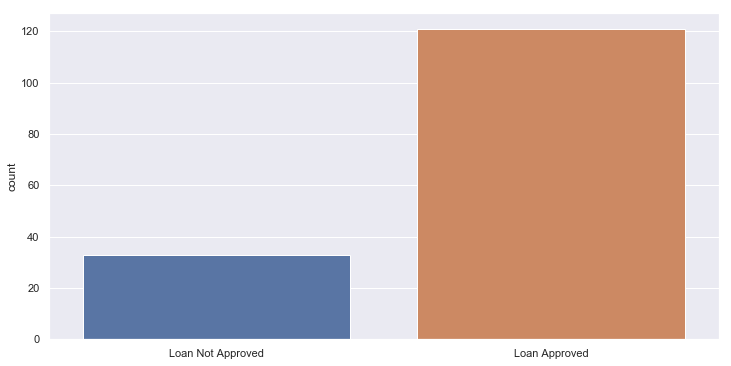

In [62]:
import seaborn as sns
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
ax = sns.countplot(x=predictions)
ax.set_xticklabels(["Loan Not Approved","Loan Approved"])

In [63]:
print ("FOLLOWING IS THE COUNTPLOT DISPLAYING THE PREDICTIONS - ")

FOLLOWING IS THE COUNTPLOT DISPLAYING THE PREDICTIONS - 


In [64]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_tr,y_tr)
predictions = rf_model.predict(X_te)

In [65]:
#Print accuracy
accuracy = metrics.accuracy_score(predictions,y_te)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 79.221%


In [66]:
print("\n Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(y_te, predictions)))


 Classification report for classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False):
              precision    recall  f1-score   support

           0       0.67      0.51      0.58        43
           1       0.83      0.90      0.86       111

   micro avg       0.79      0.79      0.79       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.78      0.79      0.78       154




In [67]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_te, predictions))
count = 0

Confusion matrix:
[[ 22  21]
 [ 11 100]]


In [68]:
print ("TOTAL NUMBER OF TESTING RECORD - ",X_te.shape[0])

TOTAL NUMBER OF TESTING RECORD -  154


In [69]:
for x in range(len(X_te)):
    if(y_te[x] == predictions[x]):
        count = count + 1

In [70]:
print ("NUMBER OF CORRECTLY PREDICTED OUTPUTS - ",count)
print("\n")

NUMBER OF CORRECTLY PREDICTED OUTPUTS -  122




In [71]:
for x in range(0,5):
    if(y_te[x] == predictions[x]):
        print ("TESTING RECORD - ",X_te[x])
        print ("ACTUAL OUTPUT - ", y_te[x])
        print ("PREDICTED OUTPUT - ",predictions[x])
        print ("_________________________________")

TESTING RECORD -  [1.]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
TESTING RECORD -  [1.]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
TESTING RECORD -  [1.]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________


[Text(0, 0, 'Loan Not Approved'), Text(0, 0, 'Loan Approved')]

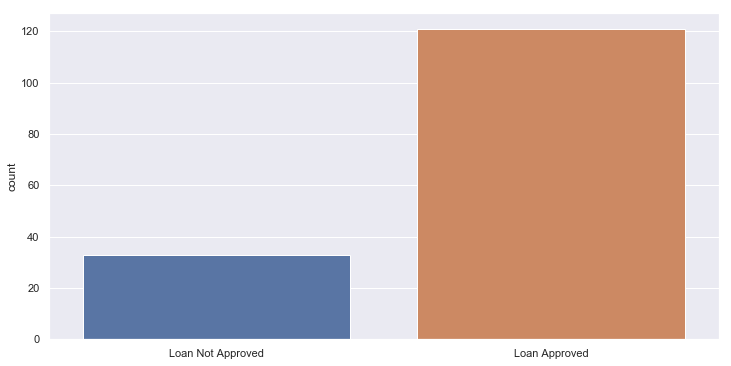

In [72]:
import seaborn as sns
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
ax = sns.countplot(x=predictions)
ax.set_xticklabels(["Loan Not Approved","Loan Approved"])

In [73]:
print ("FOLLOWING IS THE COUNTPLOT DISPLAYING THE PREDICTIONS - ")

FOLLOWING IS THE COUNTPLOT DISPLAYING THE PREDICTIONS - 


In [74]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_tr,y_tr)
predictions = clf.predict(X_te)

In [75]:
#Print accuracy
accuracy = metrics.accuracy_score(predictions,y_te)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 79.221%


In [76]:
print("\n Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_te, predictions)))


 Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'):
              precision    recall  f1-score   support

           0       0.67      0.51      0.58        43
           1       0.83      0.90      0.86       111

   micro avg       0.79      0.79      0.79       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.78      0.79      0.78       154




In [77]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_te, predictions))
count = 0

Confusion matrix:
[[ 22  21]
 [ 11 100]]


In [78]:
print ("TOTAL NUMBER OF TESTING RECORD - ",X_te.shape[0])

TOTAL NUMBER OF TESTING RECORD -  154


In [79]:
for x in range(len(X_te)):
    if(y_te[x] == predictions[x]):
        count = count + 1

In [80]:
print ("NUMBER OF CORRECTLY PREDICTED OUTPUTS - ",count)
print("\n")

NUMBER OF CORRECTLY PREDICTED OUTPUTS -  122




In [83]:
for x in range(0,5):
    if(y_te[x] == predictions[x]):
        print ("TESTING RECORD - ",X_te[x])
        print ("ACTUAL OUTPUT - ", y_te[x])
        print ("PREDICTED OUTPUT - ",predictions[x])
        print ("_________________________________")

TESTING RECORD -  [1.]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
TESTING RECORD -  [1.]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
TESTING RECORD -  [1.]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
